In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Syneromics plots

In [2]:
csiro_palette = ['#00A9CE', '#007377', '#1E22AA', '#00B0F0', '#6D2077']

sns.set_palette(palette=csiro_palette)

In [3]:
# data_folder = "nbatch_with_bc/"
data_folder = "only_pc_results/"

In [4]:
synergies = pd.read_csv(data_folder + "syn_results/final_results.tsv", sep='\t')

In [5]:
n = synergies.order.value_counts()

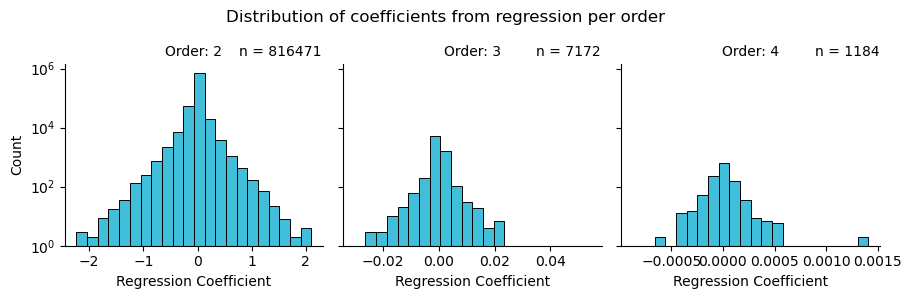

In [6]:
g = sns.FacetGrid(data=synergies, col='order', col_wrap=3, sharey=True, sharex=False)
g.map(sns.histplot, 'coef',log = True, bins=22)
plt.ylim(1)
g.set(xlabel="Regression Coefficient")
g.set_titles(col_template="Order: {col_name}")
g.figure.subplots_adjust(top=0.8)
g.figure.suptitle("Distribution of coefficients from regression per order")
x = [0.271, 0.601, 0.911]
for i in range(3):
    g.figure.text(x[i], 0.825, f'n = {n[i+2]}')

plt.savefig('../analysis/img/coef_prior.png')
plt.show()

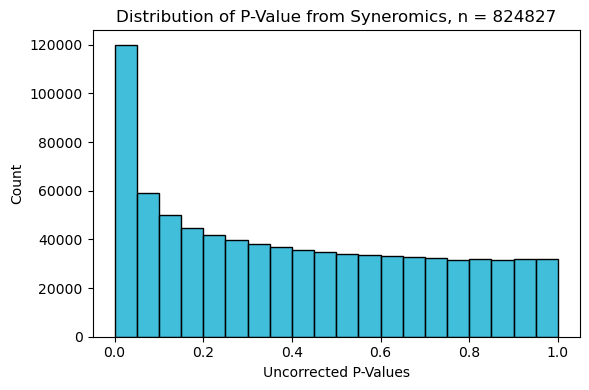

In [31]:
plt.rcParams['figure.figsize']=(6,4)
hist = sns.histplot(synergies, x='P>|z|', bins=20, color='#00A9CE')
hist.set(xlabel="Uncorrected P-Values", title=f"Distribution of P-Value from Syneromics, n = {len(synergies.coef_id)}")
plt.savefig("../analysis/img/syn_pvalues.png")
plt.show()

In [20]:
synergies[synergies.order == 4]

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug
25942,Oaafbf:Pbfffj:Pegjcg:QjUNEh,-0.000014,0.000026,-0.555283,0.578902,-0.000065,0.000036,625,0.180742,True,O00515*P15559*P46926*Q9UNE7,4,CHEMBL109480
25943,Ogaici:Pagbdc:Pfadjf:QfRKVg,0.000023,0.000096,0.243222,0.807914,-0.000165,0.000212,625,0.017608,True,O60828*P06132*P50395*Q5RKV6,4,CHEMBL109480
25944,Pajbae:Pccgib:Qbdabb:QjHdPh,0.000066,0.000039,1.724055,0.085198,-0.000009,0.000142,625,0.040294,True,P09104*P22681*Q13011*Q9H3P7,4,CHEMBL109480
25945,Ojfigb:Pedijh:QfTCbc:QjNPDd,0.000093,0.000000,0.549932,0.582565,-0.000239,0.000425,625,0.021099,True,O95861*P43897*Q5TC12*Q9NPD3,4,CHEMBL109480
25946,Pdgjfc:Pfebdg:Pgcifb:QjgGQh,0.000184,0.000000,1.560771,0.119090,-0.000047,0.000415,625,0.049041,True,P36952*P54136*P62851*Q96GQ7,4,CHEMBL109480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824822,Oedbfj:QjBUHg:QjUBIg:Qjchif,0.000036,0.000028,1.311757,0.190085,-0.000018,0.000090,630,0.138025,True,O43159*Q9BUH6*Q9UBI6*Q92785,4,CHEMBL98
824823,Pcjjjc:Pfaddg:Qjcggh:QjgJQc,0.000059,0.000042,1.406420,0.160098,-0.000023,0.000141,630,0.044325,True,P29992*P50336*Q92667*Q96JQ2,4,CHEMBL98
824824,Ogachb:Ojeiia:Pajhfi:QjBVVh,0.000004,0.000030,0.123194,0.901993,-0.000056,0.000063,630,0.073623,True,O60271*O94880*P09758*Q9BVV7,4,CHEMBL98
824825,Oaahfe:Pgcdbg:QjBTaj:QjBXJj,-0.000030,0.000052,-0.570325,0.568663,-0.000131,0.000072,630,0.113132,True,O00754*P62316*Q9BT09*Q9BXJ9,4,CHEMBL98


In [84]:
synergies.snps.drop_duplicates()

0                       P10644*Q9NYF8
1                       Q14677*Q8NEY8
2                       P50336*Q14677
3                       P50336*Q9UKV5
4                       Q08752*Q6NUK1
                     ...             
824822    O43159*Q9BUH6*Q9UBI6*Q92785
824823    P29992*P50336*Q92667*Q96JQ2
824824    O60271*O94880*P09758*Q9BVV7
824825    O00754*P62316*Q9BT09*Q9BXJ9
824826    P07942*P52272*Q13685*Q9NY27
Name: snps, Length: 742466, dtype: object

In [85]:
synergies

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug
0,Pbagee:QjNYFi,0.256486,0.113000,2.273635,0.023328,0.034953,0.478019,625,0.009699,True,P10644*Q9NYF8,2,CHEMBL109480
1,Qbeghh:QiNEYi,0.022985,0.019000,1.211605,0.226124,-0.014270,0.060240,625,0.005295,True,Q14677*Q8NEY8,2,CHEMBL109480
2,Pfaddg:Qbeghh,-0.015988,0.022000,-0.727467,0.467214,-0.059146,0.027171,625,0.031992,True,P50336*Q14677,2,CHEMBL109480
3,Pfaddg:QjUKVf,0.000117,0.007000,0.017571,0.985986,-0.013000,0.013235,625,0.041778,True,P50336*Q9UKV5,2,CHEMBL109480
4,Qaihfc:QgNUKb,-0.018627,0.028000,-0.668619,0.503987,-0.073335,0.036081,625,0.003025,True,Q08752*Q6NUK1,2,CHEMBL109480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824822,Oedbfj:QjBUHg:QjUBIg:Qjchif,0.000036,0.000028,1.311757,0.190085,-0.000018,0.000090,630,0.138025,True,O43159*Q9BUH6*Q9UBI6*Q92785,4,CHEMBL98
824823,Pcjjjc:Pfaddg:Qjcggh:QjgJQc,0.000059,0.000042,1.406420,0.160098,-0.000023,0.000141,630,0.044325,True,P29992*P50336*Q92667*Q96JQ2,4,CHEMBL98
824824,Ogachb:Ojeiia:Pajhfi:QjBVVh,0.000004,0.000030,0.123194,0.901993,-0.000056,0.000063,630,0.073623,True,O60271*O94880*P09758*Q9BVV7,4,CHEMBL98
824825,Oaahfe:Pgcdbg:QjBTaj:QjBXJj,-0.000030,0.000052,-0.570325,0.568663,-0.000131,0.000072,630,0.113132,True,O00754*P62316*Q9BT09*Q9BXJ9,4,CHEMBL98


In [7]:
from  statsmodels.stats.multitest import multipletests
synergies.loc[:,'p_fdr'] = 1  
correction = 'fdr_bh'

f = 0.2
synergies = synergies[np.abs(synergies.coef) > f]

# do the correction per order
for d in synergies.drug.unique():
    for o in range(2,5):
        if synergies[(synergies.order == o) & (synergies.drug == d)].shape[0] == 0: continue
        synergies.loc[(synergies.order == o) & (synergies.drug == d), 'p_fdr'] = multipletests(synergies.loc[(synergies.order == o) & (synergies.drug == d),'P>|z|'], method=correction)[1]
synergies.head()

C:\Users\wen068\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug,p_fdr
0,Pbagee:QjNYFi,0.256486,0.113,2.273635,0.023328,0.034953,0.478019,625,0.009699,True,P10644*Q9NYF8,2,CHEMBL109480,0.057727
19,Qbcjfj:QjgTcd,-0.271522,0.103,-2.648542,0.008289,-0.472845,-0.070199,625,0.023346,True,Q12959*Q96T23,2,CHEMBL109480,0.032284
45,Pffhdf:Qbfeci,0.231420,0.276,0.837970,0.402370,-0.310914,0.773754,625,0.003885,True,P55735*Q15428,2,CHEMBL109480,0.413572
72,Pfbbei:Qbcjfj,0.213529,0.094,2.274629,0.023268,0.029180,0.397879,625,0.010724,True,P51148*Q12959,2,CHEMBL109480,0.057727
76,Pdabab:Pgchfd,0.438490,0.192,2.283092,0.022762,0.061325,0.815656,625,0.041594,True,P30101*P62753,2,CHEMBL109480,0.057402


In [7]:
synergies.shape

(30182, 14)

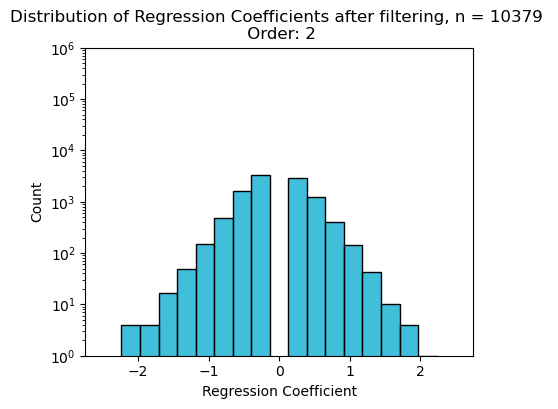

In [9]:
plt.rcParams['figure.figsize']=(5,4)
hist = sns.histplot(synergies[synergies.p_fdr < 0.05], x='coef', bins=np.linspace(-2.5,2.5,20), log = True)
hist.set(xlabel="Regression Coefficient", title=f"Distribution of Regression Coefficients after filtering, n = {len(synergies[synergies.p_fdr < 0.05].coef_id)} \n Order: 2")
plt.ylim(1, np.power(10,6))
plt.savefig('../analysis/img/syn_coef_post.png', bbox_inches='tight')
plt.show()

In [10]:
sum(synergies['P>|z|'] == 0.0)

0

In [27]:
del synergies

### Explainability plots

In [10]:
models = pd.read_csv(data_folder + "exp_results/combined_models.tsv", sep='\t')

In [11]:
models = models[models.order < 3]
models

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,pearsonR,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins
0,Intercept,9.977637,14.509,0.687703,0.492924,-18.739027,38.694300,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Intercept
1,Pbfffj,-0.115312,0.027,-4.228742,0.000045,-0.169285,-0.061340,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,P15559
2,QjBPUg,-0.034145,0.079,-0.431518,0.666841,-0.190759,0.122470,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q9BPU6
3,Qbfbej,-0.048799,0.205,-0.237923,0.812333,-0.454759,0.357160,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q15149
4,Qbebje,-0.011199,0.058,-0.193333,0.847015,-0.125851,0.103453,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q14194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64318,QhLeIc,0.029670,0.016,1.883451,0.310729,-0.170492,0.229832,630,0.999893,0.932761,...,0.261133,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,Q7L4I2
64319,QiIXQe,0.037843,0.015,2.452773,0.246453,-0.158195,0.233881,630,0.999893,0.932761,...,0.261133,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,Q8IXQ4
64320,QjHcDg,0.069665,0.014,5.153071,0.122025,-0.102111,0.241440,630,0.999893,0.932761,...,0.261133,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,Q9H2D6
64321,Ojehgd,0.015134,0.012,1.303822,0.416526,-0.132349,0.162616,630,0.999893,0.932761,...,0.261133,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,O94763


array([<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
      dtype=object)

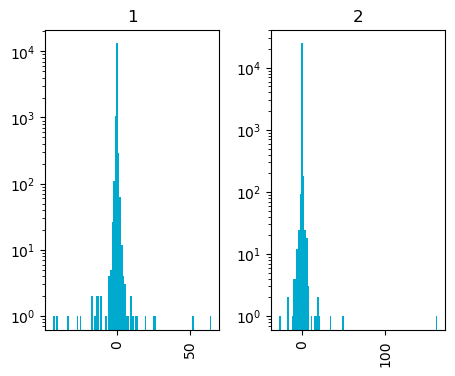

In [12]:
models.hist('coef', bins=100, log='True', by='order')

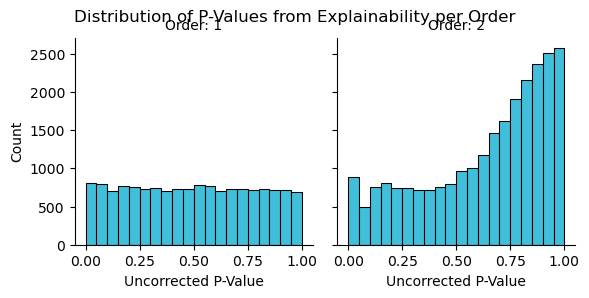

In [13]:
g = sns.FacetGrid(data=models[models.coef_id != 'Intercept'], col='order', col_wrap=2, sharex=True, sharey=True)
g.map(sns.histplot, 'P>|z|', bins=20)
g.set(xlabel="Uncorrected P-Value")
g.set_titles(col_template="Order: {col_name}")
g.figure.suptitle("Distribution of P-Values from Explainability per Order")
plt.savefig("../analysis/img/exp_pvalues.png")
plt.show()

In [14]:
from  statsmodels.stats.multitest import multipletests
models['p_fdr'] = 10
correction = 'fdr_bh'

# do the correction per order
for d in models.drug.unique():
    for c in models.config.unique():
        for o in range(1,5):
            if models[(models.order == o) & (models.drug == d) & (models.config == c)].shape[0] == 0: continue
            models.loc[(models.order == o) & (models.drug == d) & (models.config == c), 'p_fdr'] = multipletests(models['P>|z|'][(models.order == o) & (models.drug == d) & (models.config == c)], method=correction)[1]
models.head()

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins,p_fdr
0,Intercept,9.977637,14.509,0.687703,0.492924,-18.739027,38.694300,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Intercept,0.953534
1,Pbfffj,-0.115312,0.027,-4.228742,0.000045,-0.169285,-0.061340,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,P15559,0.022659
2,QjBPUg,-0.034145,0.079,-0.431518,0.666841,-0.190759,0.122470,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q9BPU6,0.953534
3,Qbfbej,-0.048799,0.205,-0.237923,0.812333,-0.454759,0.357160,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q15149,0.960862
4,Qbebje,-0.011199,0.058,-0.193333,0.847015,-0.125851,0.103453,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q14194,0.964442


In [15]:
models[(models.p_fdr < 0.05) & (models.coef_id.str.contains(':'))].value_counts(['drug'])

drug        
CHEMBL417       249
CHEMBL325041      1
dtype: int64

In [16]:
syn_mask = models.coef_id.str.contains(':')

In [17]:
synergies = models[syn_mask]
synergies = synergies[synergies.order == 2]
synergies.config.value_counts()

a: 0.05 f: 0.2    10379
Name: config, dtype: int64

In [18]:
n = synergies.config.value_counts()

In [19]:
model_2 = models[models.order ==2]

In [20]:
model_2[model_2.coef_id.str.contains(':')]

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins,p_fdr
502,Pbbacb:QjNPAi,0.017428,0.047,0.368950,0.774983,-0.582772,0.617628,625,0.998132,-0.165590,...,2,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,P11021:Q9NPA8+P11021:Q9NPA8,0.999994
503,Pgcdag:Qbdbei,-0.014725,0.063,-0.233901,0.853724,-0.814643,0.785193,625,0.998132,-0.165590,...,2,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,P62306:Q13148+P62306:Q13148,0.999994
504,QigVib:QjYcWc,-0.037430,0.053,-0.699704,0.611326,-0.717145,0.642284,625,0.998132,-0.165590,...,2,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,Q86V81:Q9Y2W2+Q86V81:Q9Y2W2,0.999994
505,Qbfefj:Qjcfca,0.009033,0.062,0.144699,0.908516,-0.784174,0.802240,625,0.998132,-0.165590,...,2,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,Q15459:Q92520+Q15459:Q92520,0.999994
506,Oedbhc:Qbecfh,0.001596,0.061,0.026331,0.983241,-0.768796,0.771989,625,0.998132,-0.165590,...,2,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,O43172:Q14257+O43172:Q14257,0.999994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63818,Pdjacd:QjBPWi,-0.002225,0.011,-0.198345,0.875347,-0.144731,0.140282,630,0.999893,0.932761,...,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,P39023:Q9BPW8+P39023:Q9BPW8,0.920923
63819,Pdaaee:QjgHYg,-0.011927,0.008,-1.521938,0.370080,-0.111503,0.087648,630,0.999893,0.932761,...,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,P30044:Q96HY6+P30044:Q96HY6,0.600823
63820,Ohfeje:Pdgffb,-0.070182,0.014,-5.097424,0.123324,-0.245122,0.104758,630,0.999893,0.932761,...,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,O75494:P36551+O75494:P36551,0.573605
63821,Ojfcdc:QiNFHe,0.003098,0.009,0.358869,0.780650,-0.106595,0.112792,630,0.999893,0.932761,...,2,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,O95232:Q8NFH4+O95232:Q8NFH4,0.868679


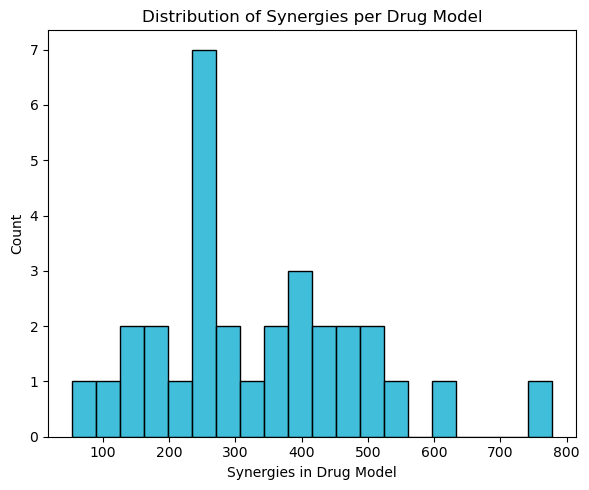

In [21]:
plt.rcParams['figure.figsize']=(6,5)
plt.rcParams['figure.autolayout'] = True

#plot = sns.violinplot(model_2[["drug","n_syn","config"]].drop_duplicates(), x="n_syn",orient="h", cut=0, scale="width", bw=0.1)
plot = sns.histplot(model_2[["drug","n_syn","config"]].drop_duplicates(), x="n_syn", bins=20)
plot.set_title("Distribution of Synergies per Drug Model")
plot.set(xlabel="Synergies in Drug Model", ylabel="Count")
# plot.set_yticks(range(len(n)))
# plot.set_yticklabels([f'alpha: 0.05 \n filter: 0 \n n = {n[0]}', f'alpha: 0.05 \n filter: 0.5 \n n = {n[2]}', f'alpha: 0.01 \n filter: 0 \n n = {n[1]}', f'alpha: 0.01 \n filter: 0.5 \n n = {n[3]}'])
plt.savefig('../analysis/img/synergy_count.png')
plt.show()

In [53]:
len(set(models.drug))

31

In [31]:
models.drug.value_counts()

CHEMBL2103875    6803
CHEMBL1614701    4441
CHEMBL553025     4123
CHEMBL888        3641
CHEMBL1231160    3461
CHEMBL34259      3365
CHEMBL417        3339
CHEMBL109480     3235
CHEMBL428647     3195
CHEMBL202721     3195
CHEMBL185        3155
CHEMBL92         3131
CHEMBL414804     2969
CHEMBL601719     2949
CHEMBL554        2757
CHEMBL191334     2737
CHEMBL1173655    2731
CHEMBL553        2729
CHEMBL939        2523
CHEMBL98         2491
CHEMBL1879463    2475
CHEMBL3137336    2469
CHEMBL288441     2389
CHEMBL83         2233
CHEMBL1201182    2182
CHEMBL603469     1977
CHEMBL1336       1939
CHEMBL64925      1865
CHEMBL1351       1863
CHEMBL325041     1835
CHEMBL413        1401
Name: drug, dtype: int64

In [32]:
del models

In [16]:
performance = pd.read_csv(data_folder + "exp_results/combined_performances.tsv", sep='\t')

In [17]:
n = performance.config.value_counts()

In [18]:
rf = pd.read_csv(data_folder + "syn_results/tree_performances.tsv", sep='\t')

In [19]:
top_rf = rf[rf.pearsonR > 0.6].drug.to_list()

In [20]:
rf["config"] = "rf"
rf["order"] = "rf"

In [21]:
combine = pd.concat([performance[performance.order < 3], rf], ignore_index=True)

In [22]:
mask = [x in top_rf for x in combine.drug]
combine[mask]

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,n_prot,n_obs,n_feat,n_syn,config,fit,train_OOB
18,0.908975,0.556166,0.232823,5.792403,0.953402,0.405419,CHEMBL191334,1,500.0,630.0,500.0,0.0,a: 0.05 f: 0.2,normal,NaN
19,0.999507,0.689941,0.001261,19.310954,0.999753,0.254684,CHEMBL191334,2,500.0,630.0,737.0,237.0,a: 0.05 f: 0.2,normal,NaN
22,0.934846,0.682313,0.332979,11.742940,0.966875,0.415522,CHEMBL2103875,1,500.0,630.0,500.0,0.0,a: 0.05 f: 0.2,normal,NaN
23,0.999198,0.495567,0.004099,6.215391,0.999599,0.518436,CHEMBL2103875,2,500.0,630.0,1278.0,778.0,a: 0.05 f: 0.2,normal,NaN
71,NaN,NaN,1.737218,1.973273,0.630513,0.682457,CHEMBL191334,rf,NaN,NaN,NaN,NaN,rf,NaN,0.321893
73,NaN,NaN,2.959643,2.626075,0.690184,0.645104,CHEMBL2103875,rf,NaN,NaN,NaN,NaN,rf,NaN,0.421810


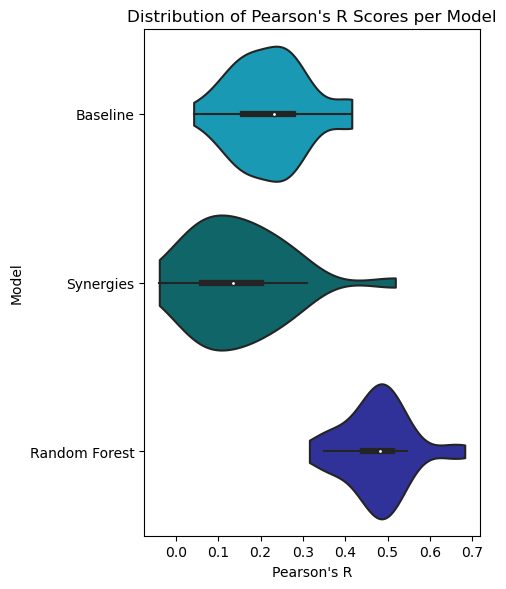

In [23]:
plt.rcParams['figure.figsize']=(5,6)
plt.rcParams['figure.autolayout'] = True
violin = sns.violinplot(combine, x="pearsonR", y="order", orient="h", cut=0, scale="count")
# plt.axvline(0.49, 0, c="#6D2077")
# plt.axvline(0.52, 0, c="#6D2077")
# plt.axvline(combine.pearsonR.mean(), 0, c="#6D2077")
violin.set_title("Distribution of Pearson's R Scores per Model")
violin.set(xlabel="Pearson's R", ylabel="Model")

# violin.set_yticks(range(5))
violin.set_yticklabels(['Baseline', 'Synergies', 'Random Forest'])

# y_pos = [2,3,0,1]
# for i in range(4):
#     violin.text(0.75, y_pos[i]+0.2, f'n = {n[3*i]} \n \nn = {n[3*i+1]} \n \nn = {n[3*i+2]}')
# violin.text(0.75, 4-0.4, f'n = {len(rf.order)}')
# violin.text(-0.025, 4+0.4, f'ProCan mean values')
plt.savefig('../analysis/img/personR.png') #
plt.show()

In [24]:
pearsonR = pd.pivot_table(combine, values = 'pearsonR', index=['drug','config'], columns=["order"])

In [47]:
n = pearsonR.count()
n

order
1    62
2    31
4    31
dtype: int64

In [48]:
pearsonR

order                                1         2         4
drug          config                                      
CHEMBL109480  a: 0.05 f: 0.2  0.282587  0.161242  0.161242
              rf              0.348900       NaN       NaN
CHEMBL1173655 a: 0.05 f: 0.2  0.156340 -0.039259 -0.039259
              rf              0.588592       NaN       NaN
CHEMBL1201182 a: 0.05 f: 0.2  0.299563  0.042330  0.042330
...                                ...       ...       ...
CHEMBL92      rf              0.626581       NaN       NaN
CHEMBL939     a: 0.05 f: 0.2  0.159542  0.159574  0.159574
              rf              0.443473       NaN       NaN
CHEMBL98      a: 0.05 f: 0.2  0.411961  0.261133  0.261133
              rf              0.385158       NaN       NaN

[62 rows x 3 columns]

In [49]:
improve = pearsonR[pearsonR.iloc[:,0] < pearsonR.iloc[:,1]]
improve

,order,1,2,4
drug,config,,,
CHEMBL1614701,a: 0.05 f: 0.2,0.123219,0.295722,0.295722
CHEMBL202721,a: 0.05 f: 0.2,0.246459,0.308902,0.308902
CHEMBL2103875,a: 0.05 f: 0.2,0.415522,0.518436,0.518436
CHEMBL34259,a: 0.05 f: 0.2,0.098580,0.152695,0.152695
CHEMBL413,a: 0.05 f: 0.2,0.263718,0.265698,0.265698
CHEMBL428647,a: 0.05 f: 0.2,0.184124,0.186388,0.186388
CHEMBL553025,a: 0.05 f: 0.2,0.237074,0.239192,0.239192
CHEMBL603469,a: 0.05 f: 0.2,0.041914,0.110328,0.110328
CHEMBL939,a: 0.05 f: 0.2,0.159542,0.159574,0.159574


In [50]:
drugs = [x[0] for x in improve.index.to_flat_index()]

In [51]:
len(set(drugs))

9